In [180]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stt

import thinkstats2
import thinkplot

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axis', 'std', 'var', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Read Data

In [99]:
df_olympic = pd.read_csv("athlete_events.csv")
olympic = df_olympic.copy()

Dataset variable information

In [100]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


A Glimpse of data in the dataset

In [101]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Lets gets mean of numeric fields in the data set

In [102]:
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


So mean age is 25.56, mean height is 175cm and mean weight is 70 kg.

In [103]:
winners = olympic[pd.notnull(olympic['Medal'])]

In [104]:
winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


Histogram of Age of winners

Text(0.5, 1.0, 'Histogram - Age of winners')

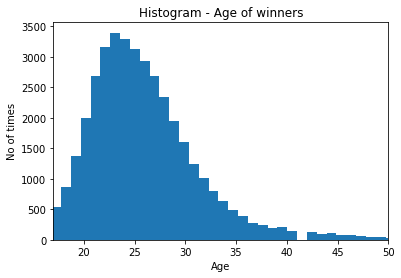

In [105]:
#winners.hist(column = 'Age', xlim)
ageHist = plt.hist(winners['Age'], bins=65)
plt.ylabel('No of times')
plt.xlim(17,50)
plt.xlabel('Age')
plt.title('Histogram - Age of winners')

Histogram of Height of winners

Text(0.5, 1.0, 'Histogram - Height of winners')

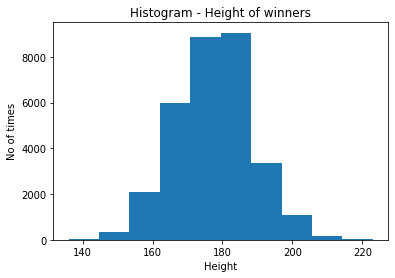

In [106]:
plt.hist(winners['Height'])
plt.ylabel('No of times')
plt.xlabel('Height')
plt.title('Histogram - Height of winners')

Histogram of Weight of winners

Text(0.5, 1.0, 'Histogram - Weight of winners')

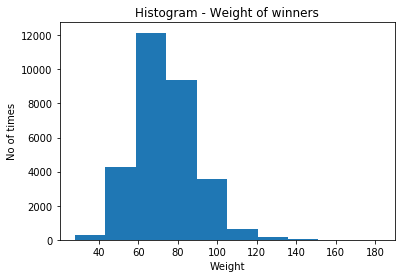

In [107]:
plt.hist(winners['Weight'])
plt.ylabel('No of times')
plt.xlabel('Weight')
plt.title('Histogram - Weight of winners')

By looking at the histograms we can identify outliers which looks obvious.
1. Looks like athlete beyond age 36 have rare chance of winning and should be considered outlier.
2. Athlete with height out side the range of (150cm to 190cm) have less chances and should be considered outlier.
3. Athlete with weight out side the range of (42kg to 120kg) have less chances and should be considered outlier.

We can remove these records to handle these exception scenarios.

Various stats about these fields can be calculate using pandas describe function

In [108]:
winners.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39051.000000,31072.000000,30456.000000,39783.000000
mean,69407.051806,25.925175,177.554197,73.770680,1973.943845
std,38849.980737,5.914026,10.893723,15.016025,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,63.000000,1952.000000
50%,68990.000000,25.000000,178.000000,73.000000,1984.000000
75%,103461.500000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


In [109]:
filtered_winners = winners[(winners['Height'] >=150) & (winners['Height'] <=190)]
filtered_winners = filtered_winners[(filtered_winners['Weight'] >=40) & (filtered_winners['Weight'] <=120)]
filtered_winners = filtered_winners[(filtered_winners['Age'] >=15) & (filtered_winners['Age'] <=35)]


After removing outliers

In [110]:
filtered_winners.describe()

,ID,Age,Height,Weight,Year
count,25440.000000,25440.000000,25440.000000,25440.000000,25440.000000
mean,70287.397759,24.886439,175.402869,70.967669,1987.187579
std,38780.564911,4.147715,8.736806,12.327385,23.188538
min,16.000000,15.000000,150.000000,40.000000,1896.000000
25%,37728.250000,22.000000,170.000000,62.000000,1972.000000
50%,69571.500000,25.000000,176.000000,70.000000,1992.000000
75%,104161.500000,28.000000,182.250000,79.000000,2004.000000
max,135563.000000,35.000000,190.000000,120.000000,2016.000000


Lets see how it works out for Male vs Female.

In [111]:
filtered_winners['maleWinners'] = (filtered_winners['Sex'] == 'M')
mWinners = filtered_winners[(filtered_winners['maleWinners'] == True)]
fWinners = filtered_winners[(filtered_winners['maleWinners'] == False)]

In [112]:
pmfMaleAge = thinkstats2.Pmf(mWinners.Age, label='male')
pmfFemaleAge = thinkstats2.Pmf(fWinners.Age, label='female')
pmfAge = thinkstats2.Pmf(filtered_winners.Age, label='male')

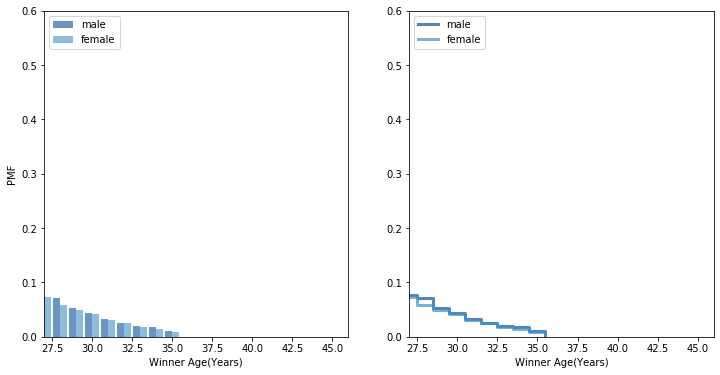

In [113]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfMaleAge, align='right', width=width, label='male')
thinkplot.Hist(pmfFemaleAge, align='left', width=width, label='female')
thinkplot.Config(xlabel='Winner Age(Years)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfMaleAge, pmfFemaleAge])
thinkplot.Config(xlabel='Winner Age(Years)', axis=axis)

It seems like age have identical effect on both Male and Female athlete. 

Now, let's look at CDF.

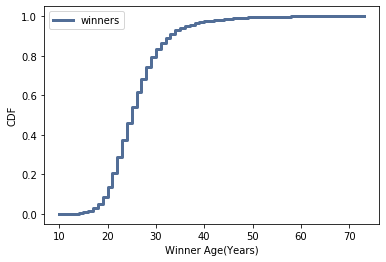

In [117]:
cdfWinners = thinkstats2.Cdf(winners.Age, label='winners')

thinkplot.Cdf(cdfWinners)
thinkplot.Config(xlabel='Winner Age(Years)', ylabel='CDF', loc='upper left')

In [118]:
print("90% winner are below: ", cdfWinners.Value(0.9))
print("10% winner are below: ", cdfWinners.Value(0.1))

90% winner are below:  33.0
10% winner are below:  20.0


We can see 10% of the winners are below 20 year age and 90% of the winners are below 33.

We can see as athelete get older winning chances are increasing but after a certain age it is decresing and there is flat line after a certain age.

### Normal distribution

Here's what the normal CDF looks like with a range of parameters.

In [120]:
fullAge = winners.Age.dropna()
maleAge = winners[(winners['Sex'] == 'M')].Age.dropna()
femaleAge = winners[(winners['Sex'] == 'F')].Age.dropna()

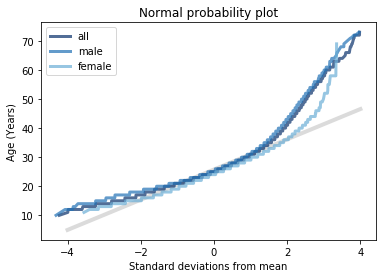

In [123]:
mean, var = thinkstats2.TrimmedMeanVar(fullAge, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(3) 
xs, ys = thinkstats2.NormalProbability(fullAge)
thinkplot.Plot(xs, ys, label='all')

xs, ys = thinkstats2.NormalProbability(maleAge)
thinkplot.Plot(xs, ys, label='male')

xs, ys = thinkstats2.NormalProbability(femaleAge)
thinkplot.Plot(xs, ys, label='female')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Age (Years)')

From age 20 to 30 it looks like normally distributed but for other ranges it is not. 

Also famales age not aligned to normal distribution then male athletes.

In [143]:

# Jitter 
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values


Age = olympic.Age
MedalNum = []

for index, row in olympic.iterrows():
    if row['Medal'] == 'Gold':
        MedalNum.append(1)
    elif row['Medal'] == 'Silver':
        MedalNum.append(2)
    elif row['Medal'] == 'Bronze':
        MedalNum.append(3)
    else:
        MedalNum.append(4)
        

MedalNum = Jitter(MedalNum, .3)



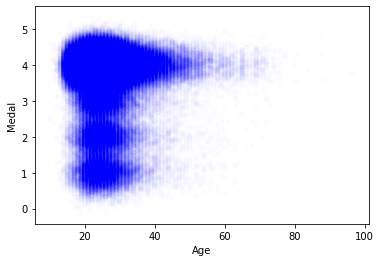

In [144]:
thinkplot.Scatter(fullAge, MedalNum, alpha=0.01)
thinkplot.Config(xlabel='Age',
                 ylabel='Medal',
                 legend=False)

Here 1 -> Gold, 2 -> Silver, 3 -> Bronse and 4 -> No Medal

It shows there is high rate of no medal after 33.

In [157]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

olympic1 = olympic.dropna(subset=['Age'])
Age = olympic1.Age
MedalNum = []

for index, row in olympic1.iterrows():
    if row['Medal'] == 'Gold':
        MedalNum.append(3)
    elif row['Medal'] == 'Silver':
        MedalNum.append(2)
    elif row['Medal'] == 'Bronze':
        MedalNum.append(1)
    else:
        MedalNum.append(0)

In [158]:
print('Pearson’s Corr :', Cov(Age, MedalNum))
print('Spearman’s Corr :', SpearmanCorr(Age, MedalNum))

Pearson’s Corr : 0.11130369228361534
Spearman’s Corr : 0.040241493807069144


Pearson's correlation is around 0.11 and Spearman's correlation is around 0.04.
    The difference between the same could be baucause of non-linear relationsip or some influence of outliers.
    Correlation value shows weak correlation between mother's age and birth weight.

In [159]:
olympic1 = olympic.dropna(subset=['Age', 'Weight'])

print('Pearson’s Corr :', Cov(olympic1.Age, olympic1.Weight))
print('Spearman’s Corr :', SpearmanCorr(olympic1.Age, olympic1.Weight))

Pearson’s Corr : 16.716311783872793
Spearman’s Corr : 0.2169904316727511


In [160]:
olympic1 = olympic.dropna(subset=['Age', 'Height'])

print('Pearson’s Corr :', Cov(olympic1.Age, olympic1.Height))
print('Spearman’s Corr :', SpearmanCorr(olympic1.Age, olympic1.Height))

Pearson’s Corr : 8.049062419510982
Spearman’s Corr : 0.14541120724113926


In [161]:
olympic1 = olympic.dropna(subset=['Weight', 'Height'])

print('Pearson’s Corr :', Cov(olympic1.Weight, olympic1.Height))
print('Spearman’s Corr :', SpearmanCorr(olympic1.Weight, olympic1.Height))

Pearson’s Corr : 120.28421304723724
Spearman’s Corr : 0.8271309831688862


# Lets explore more about dataset with little more details.

1. Handle missing Data:

In [167]:
def missingData(data):
    """ Analyze missing data and display the counts"""
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    md = md[md["Percent"] > 0]
    plt.figure(figsize = (8, 4))
    plt.xticks(rotation='90')
    sns.barplot(md.index, md["Percent"],color="r",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of NaN values', fontsize=15)
    plt.title('Percent missing data by variable', fontsize=15)
    return md

def valueCounts(dataset, features):
    """Display the variable value counts """
    for feature in features:
        vc = dataset[feature].value_counts()
        print(vc)

,Total,Percent
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445


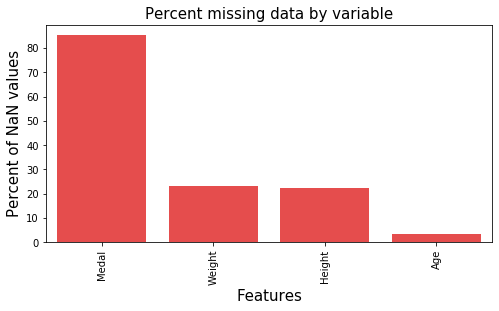

In [168]:
missingData(olympic)

Replace NaN in Medal with 'No Medal'

In [170]:
olympic['Medal'].fillna('No Medal', inplace=True)

## Find the impact of Height vs Weight on Olympic result.

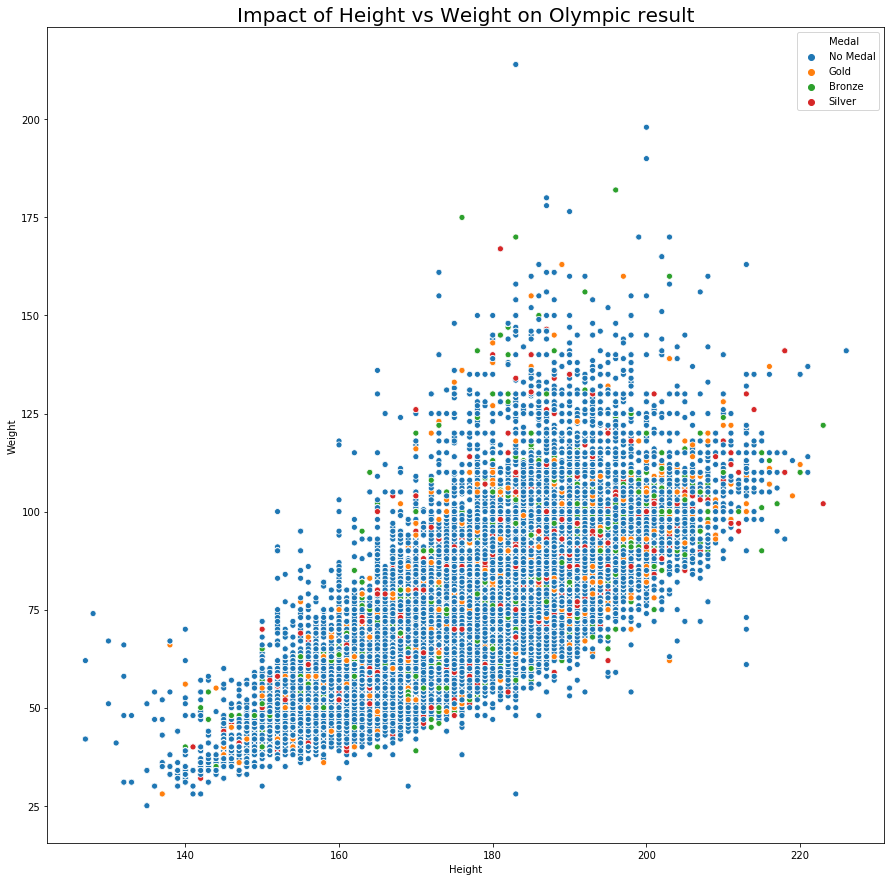

In [173]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="Height", y="Weight", hue='Medal', data=olympic)
plt.title('Impact of Height vs Weight on Olympic result', fontsize=20)
plt.show()

## Medal Distribution by Country

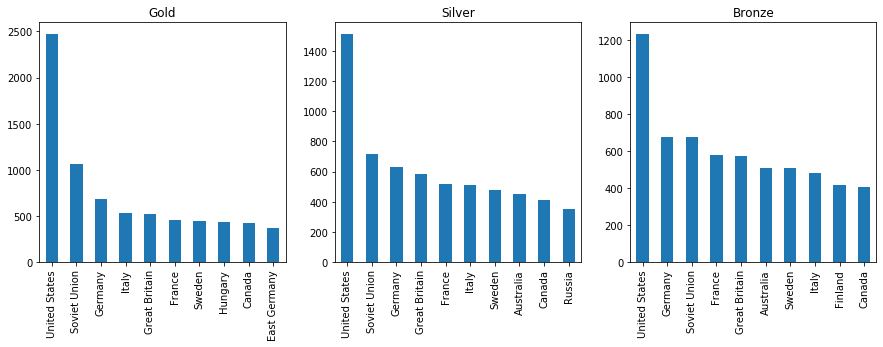

In [174]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Gold')
pd.value_counts(olympic[olympic.Medal=='Gold']['Team']).head(10).plot.bar();
ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Silver')
pd.value_counts(olympic[olympic.Medal=='Silver']['Team']).head(10).plot.bar();
ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Bronze')
pd.value_counts(olympic[olympic.Medal=='Bronze']['Team']).head(10).plot.bar();

## Lets see correlation matrix - Height vs Weight vs Age

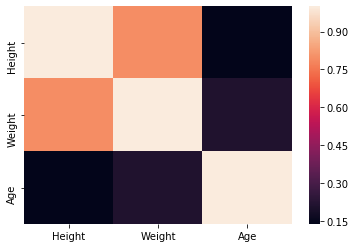

In [175]:
sns.heatmap(olympic[['Height','Weight','Age']].corr())

## Lets see hows the weight distribution

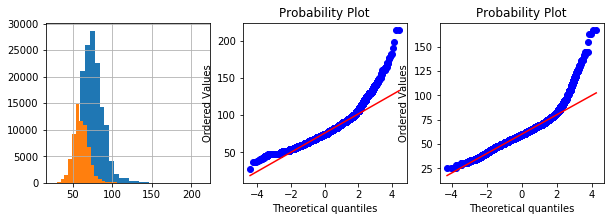

In [181]:
maleWeight = olympic.Weight[olympic.Sex=='M'].dropna()
femaleWeight = olympic.Weight[olympic.Sex=='F'].dropna()
fig = plt.figure(figsize=(10,10))
fig.add_subplot(3,3,1)
maleWeight.hist(bins=30)
femaleWeight.hist(bins=30)
fig.add_subplot(3,3,2)
stt.probplot(maleWeight, plot=pylab);
fig.add_subplot(3,3,3)
stt.probplot(femaleWeight, plot=pylab);

In [182]:
maleResample = maleWeight.iloc[[random.randint(0,maleWeight.shape[0]) for i in range(int(maleWeight.shape[0]*0.01))]]
femaleResample = femaleWeight.iloc[[random.randint(0,femaleWeight.shape[0]) for i in range(int(femaleWeight.shape[0]*0.01))]]

stt.ttest_ind_from_stats(maleResample.mean(),maleResample.std(),maleResample.shape[0],\
                         femaleResample.mean(),femaleResample.std(),femaleResample.shape[0],equal_var=True)


Ttest_indResult(statistic=25.292072991126986, pvalue=2.81512556502195e-123)

In [183]:
maleAge = olympic.Age[olympic.Sex=='M'].dropna()
femaleAge = olympic.Age[olympic.Sex=='F'].dropna()

maleResample = maleAge.iloc[[random.randint(0,maleAge.shape[0]) for i in range(int(maleAge.shape[0]*0.01))]]
femaleResample = femaleAge.iloc[[random.randint(0,femaleAge.shape[0]) for i in range(int(femaleAge.shape[0]*0.01))]]

stt.ttest_ind_from_stats(maleResample.mean(),maleResample.std(),maleResample.shape[0],\
                         femaleResample.mean(),femaleResample.std(),femaleResample.shape[0],equal_var=True)

Ttest_indResult(statistic=9.883599593401975, pvalue=1.2172012422889988e-22)

We can see that height and age means statistically significant, but p-value degree of age is much more, than weight or height, so it can be the same.

## Lets look at Female participation vs. Male participation over years

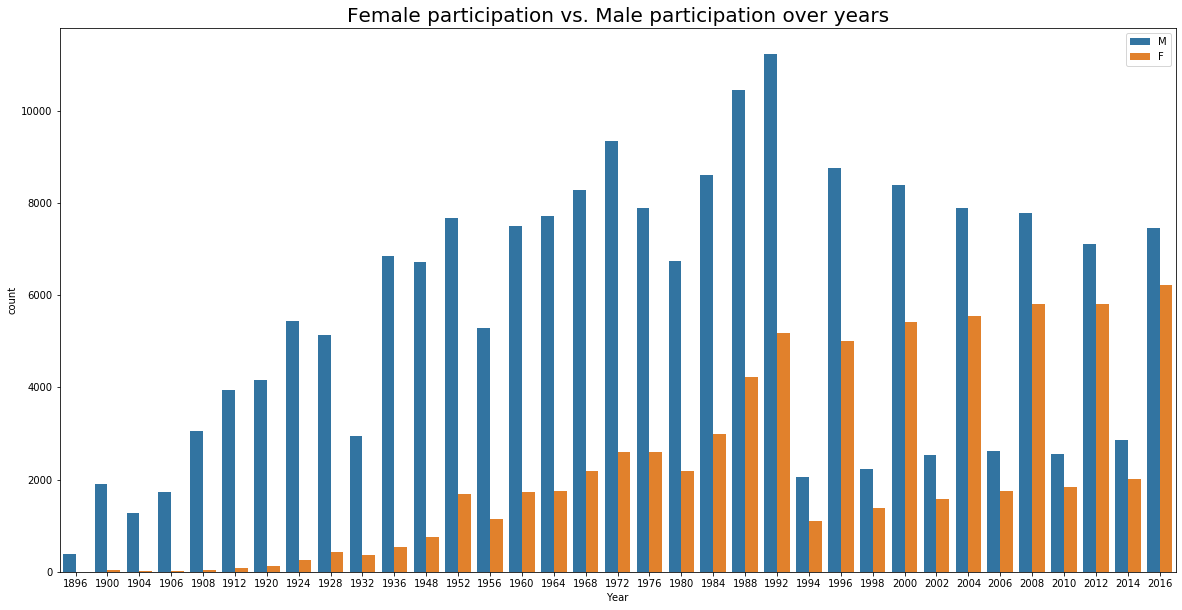

In [189]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year',hue='Sex', data=olympic)
plt.title('Female participation vs. Male participation over years', fontsize = 20)
plt.legend(loc=1)
plt.show()

We can see female participation increasing in linear fashion but thus is not always true in male participation.

